In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wfdb
import os
import transformations as tfm

import h5py
import gc

In [2]:
snomed_ct_dict = {'Atrial fibrillation':164889003,'Atrial flutter':164890007,'Normal sinus rhythm':426783006}
randompath = 'Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.0.3/training/ningbo/g1/JS10648'
training_path = r'Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.0.3/training/'

path_dx = r'E:\Arrythmia\Data\The PhysioNetComputing in Cardiology Challenge 2021\physionet.org\files\challenge-2021\1.0.3\training\dx_mapping_scored.csv'
path_dx2 = r'E:\Arrythmia\Data\The PhysioNetComputing in Cardiology Challenge 2021\physionet.org\files\challenge-2021\1.0.3\training\dx_mapping_unscored.csv'
dx_map = pd.read_csv(path_dx)
dx_map2 = pd.read_csv(path_dx2)

In [3]:
ecg = wfdb.io.rdheader(randompath)
dct = ecg.__dict__


In [4]:
int(dct['comments'][2].split(': ')[1].split(',')[0])

426177001

In [5]:
lis = os.listdir(training_path)
temp = []
temp2 = []
for i in lis:
    if os.path.isdir(training_path+i):
        temp.append(i)
        tmp = []
        for j in os.listdir(training_path+i):
            if os.path.isdir(training_path+i+'/'+j):
                tmp.append(j)
        temp2.append(tmp)
        # print(os.listdir(training_path+i))
    else:
        continue
print(temp)
print(temp2)
h1 = dict(zip(temp,temp2))

['chapman_shaoxing', 'cpsc_2018', 'cpsc_2018_extra', 'georgia', 'ningbo', 'ptb', 'ptb-xl', 'st_petersburg_incart']
[['g1', 'g10', 'g11', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9'], ['g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7'], ['g1', 'g2', 'g3', 'g4'], ['g1', 'g10', 'g11', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9'], ['g1', 'g10', 'g11', 'g12', 'g13', 'g14', 'g15', 'g16', 'g17', 'g18', 'g19', 'g2', 'g20', 'g21', 'g22', 'g23', 'g24', 'g25', 'g26', 'g27', 'g28', 'g29', 'g3', 'g30', 'g31', 'g32', 'g33', 'g34', 'g35', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9'], ['g1'], ['g1', 'g10', 'g11', 'g12', 'g13', 'g14', 'g15', 'g16', 'g17', 'g18', 'g19', 'g2', 'g20', 'g21', 'g22', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9'], ['g1']]


In [6]:
print(h1)
print(temp2,len(temp2))

{'chapman_shaoxing': ['g1', 'g10', 'g11', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9'], 'cpsc_2018': ['g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7'], 'cpsc_2018_extra': ['g1', 'g2', 'g3', 'g4'], 'georgia': ['g1', 'g10', 'g11', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9'], 'ningbo': ['g1', 'g10', 'g11', 'g12', 'g13', 'g14', 'g15', 'g16', 'g17', 'g18', 'g19', 'g2', 'g20', 'g21', 'g22', 'g23', 'g24', 'g25', 'g26', 'g27', 'g28', 'g29', 'g3', 'g30', 'g31', 'g32', 'g33', 'g34', 'g35', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9'], 'ptb': ['g1'], 'ptb-xl': ['g1', 'g10', 'g11', 'g12', 'g13', 'g14', 'g15', 'g16', 'g17', 'g18', 'g19', 'g2', 'g20', 'g21', 'g22', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9'], 'st_petersburg_incart': ['g1']}
[['g1', 'g10', 'g11', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9'], ['g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7'], ['g1', 'g2', 'g3', 'g4'], ['g1', 'g10', 'g11', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9'], ['g1', 'g10', 'g11', 'g12', 'g13', 'g14', 'g15', 'g16', 'g17', 

In [7]:
lis2 = os.listdir(training_path+temp[0]+'/'+temp2[0][0])
with open (training_path+temp[0]+'/'+temp2[0][0]+'/'+'RECORDS','r',newline='') as f:
    c = 0
    for i in f.readlines():
        c+=1
        print(i.split('\n')[0])
        if c>5:
            break

JS00001
JS00002
JS00004
JS00005
JS00006
JS00007


In [8]:
all_records = []
all_records_path = []
for i in range(len(temp)):
    for j in temp2[i]:
        with open (training_path+temp[i]+'/'+j+'/'+'RECORDS','r',newline='') as f:
            for k in f.readlines():
                all_records.append(k.split('\n')[0])
                all_records_path.append(training_path+temp[i]+'/'+j+'/'+k.split('\n')[0])
print(len(all_records),all_records[5555:5556])
print(len(all_records_path),all_records_path[5555:5556])

88253 ['JS04508']
88253 ['Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g5/JS04508']


In [9]:
print(all_records_path[1],len(all_records_path))

Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g1/JS00002 88253


In [10]:
ecg = wfdb.io.rdheader(all_records_path[1])
dct = ecg.__dict__
print(dct['comments'][2].split(': ')[1].split(',')[0])
print(dct)

426177001
{'record_name': 'JS00002', 'n_sig': 12, 'fs': 500, 'counter_freq': None, 'base_counter': None, 'sig_len': 5000, 'base_time': None, 'base_date': None, 'comments': ['Age: 59', 'Sex: Female', 'Dx: 426177001,164934002', 'Rx: Unknown', 'Hx: Unknown', 'Sx: Unknown'], 'sig_name': ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'p_signal': None, 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['JS00002.mat', 'JS00002.mat', 'JS00002.mat', 'JS00002.mat', 'JS00002.mat', 'JS00002.mat', 'JS00002.mat', 'JS00002.mat', 'JS00002.mat', 'JS00002.mat', 'JS00002.mat', 'JS00002.mat'], 'fmt': ['16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16'], 'samps_per_frame': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'skew': [None, None, None, None, None, None, None, None, None, None, None, None], 'byte_offset': [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24], 'adc_gain': [1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0

In [11]:
# Filter Normal Sinus Rhythm, Atrial Fibrillation, Atrial Flutter
all_num = len(all_records_path)
sample = []
Normal_Sinus_Rhythm = []
Atrial_Fibrillation = []
Atrial_Flutter = []
for i in all_records_path:
    try:
        ecg = wfdb.io.rdheader(i)
        dct = ecg.__dict__
        if int(dct['comments'][2].split(': ')[1].split(',')[0]) == snomed_ct_dict['Normal sinus rhythm']:
            Normal_Sinus_Rhythm.append(i)
            sample.append(i)
        elif int(dct['comments'][2].split(': ')[1].split(',')[0]) == snomed_ct_dict['Atrial fibrillation']:
            Atrial_Fibrillation.append(i)
            sample.append(i)
        elif int(dct['comments'][2].split(': ')[1].split(',')[0]) == snomed_ct_dict['Atrial flutter']:
            Atrial_Flutter.append(i)
            sample.append(i)
        else:
            all_records_path.remove(i)
            all_records.remove(i.split('/')[-1])

    except FileNotFoundError:
        print(f'File {i} Not Found')
        all_records_path.remove(i)
        all_records.remove(i.split('/')[-1])
    except KeyboardInterrupt:
        print('Keyboard Interrupt')
        print(f'{all_num-len(all_records_path)} files done out of {all_num}\n{len(all_records_path)} left out of {all_num}')
        break
    except:
        print(f'Error in {i}')
        print()
        all_records_path.remove(i)
        all_records.remove(i.split('/')[-1])



File Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g10/JS10399 Not Found
File Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g2/JS02081 Not Found
File Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g3/JS03137 Not Found
File Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g4/JS04184 Not Found
File Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g5/JS05228 Not Found
File Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g6/JS06266 Not Found
File Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.

In [12]:
ecgg = wfdb.io.rdheader(Normal_Sinus_Rhythm[5])
dctg = ecgg.__dict__
print(dctg['comments'][2].split(': ')[1].split(',')[0])
print(dctg)
print(len(Normal_Sinus_Rhythm),len(Atrial_Fibrillation),len(Atrial_Flutter),len(sample),len(all_records_path))

426783006
{'record_name': 'JS00068', 'n_sig': 12, 'fs': 500, 'counter_freq': None, 'base_counter': None, 'sig_len': 5000, 'base_time': None, 'base_date': None, 'comments': ['Age: 43', 'Sex: Female', 'Dx: 426783006', 'Rx: Unknown', 'Hx: Unknown', 'Sx: Unknown'], 'sig_name': ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'p_signal': None, 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['JS00068.mat', 'JS00068.mat', 'JS00068.mat', 'JS00068.mat', 'JS00068.mat', 'JS00068.mat', 'JS00068.mat', 'JS00068.mat', 'JS00068.mat', 'JS00068.mat', 'JS00068.mat', 'JS00068.mat'], 'fmt': ['16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16'], 'samps_per_frame': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'skew': [None, None, None, None, None, None, None, None, None, None, None, None], 'byte_offset': [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24], 'adc_gain': [1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 

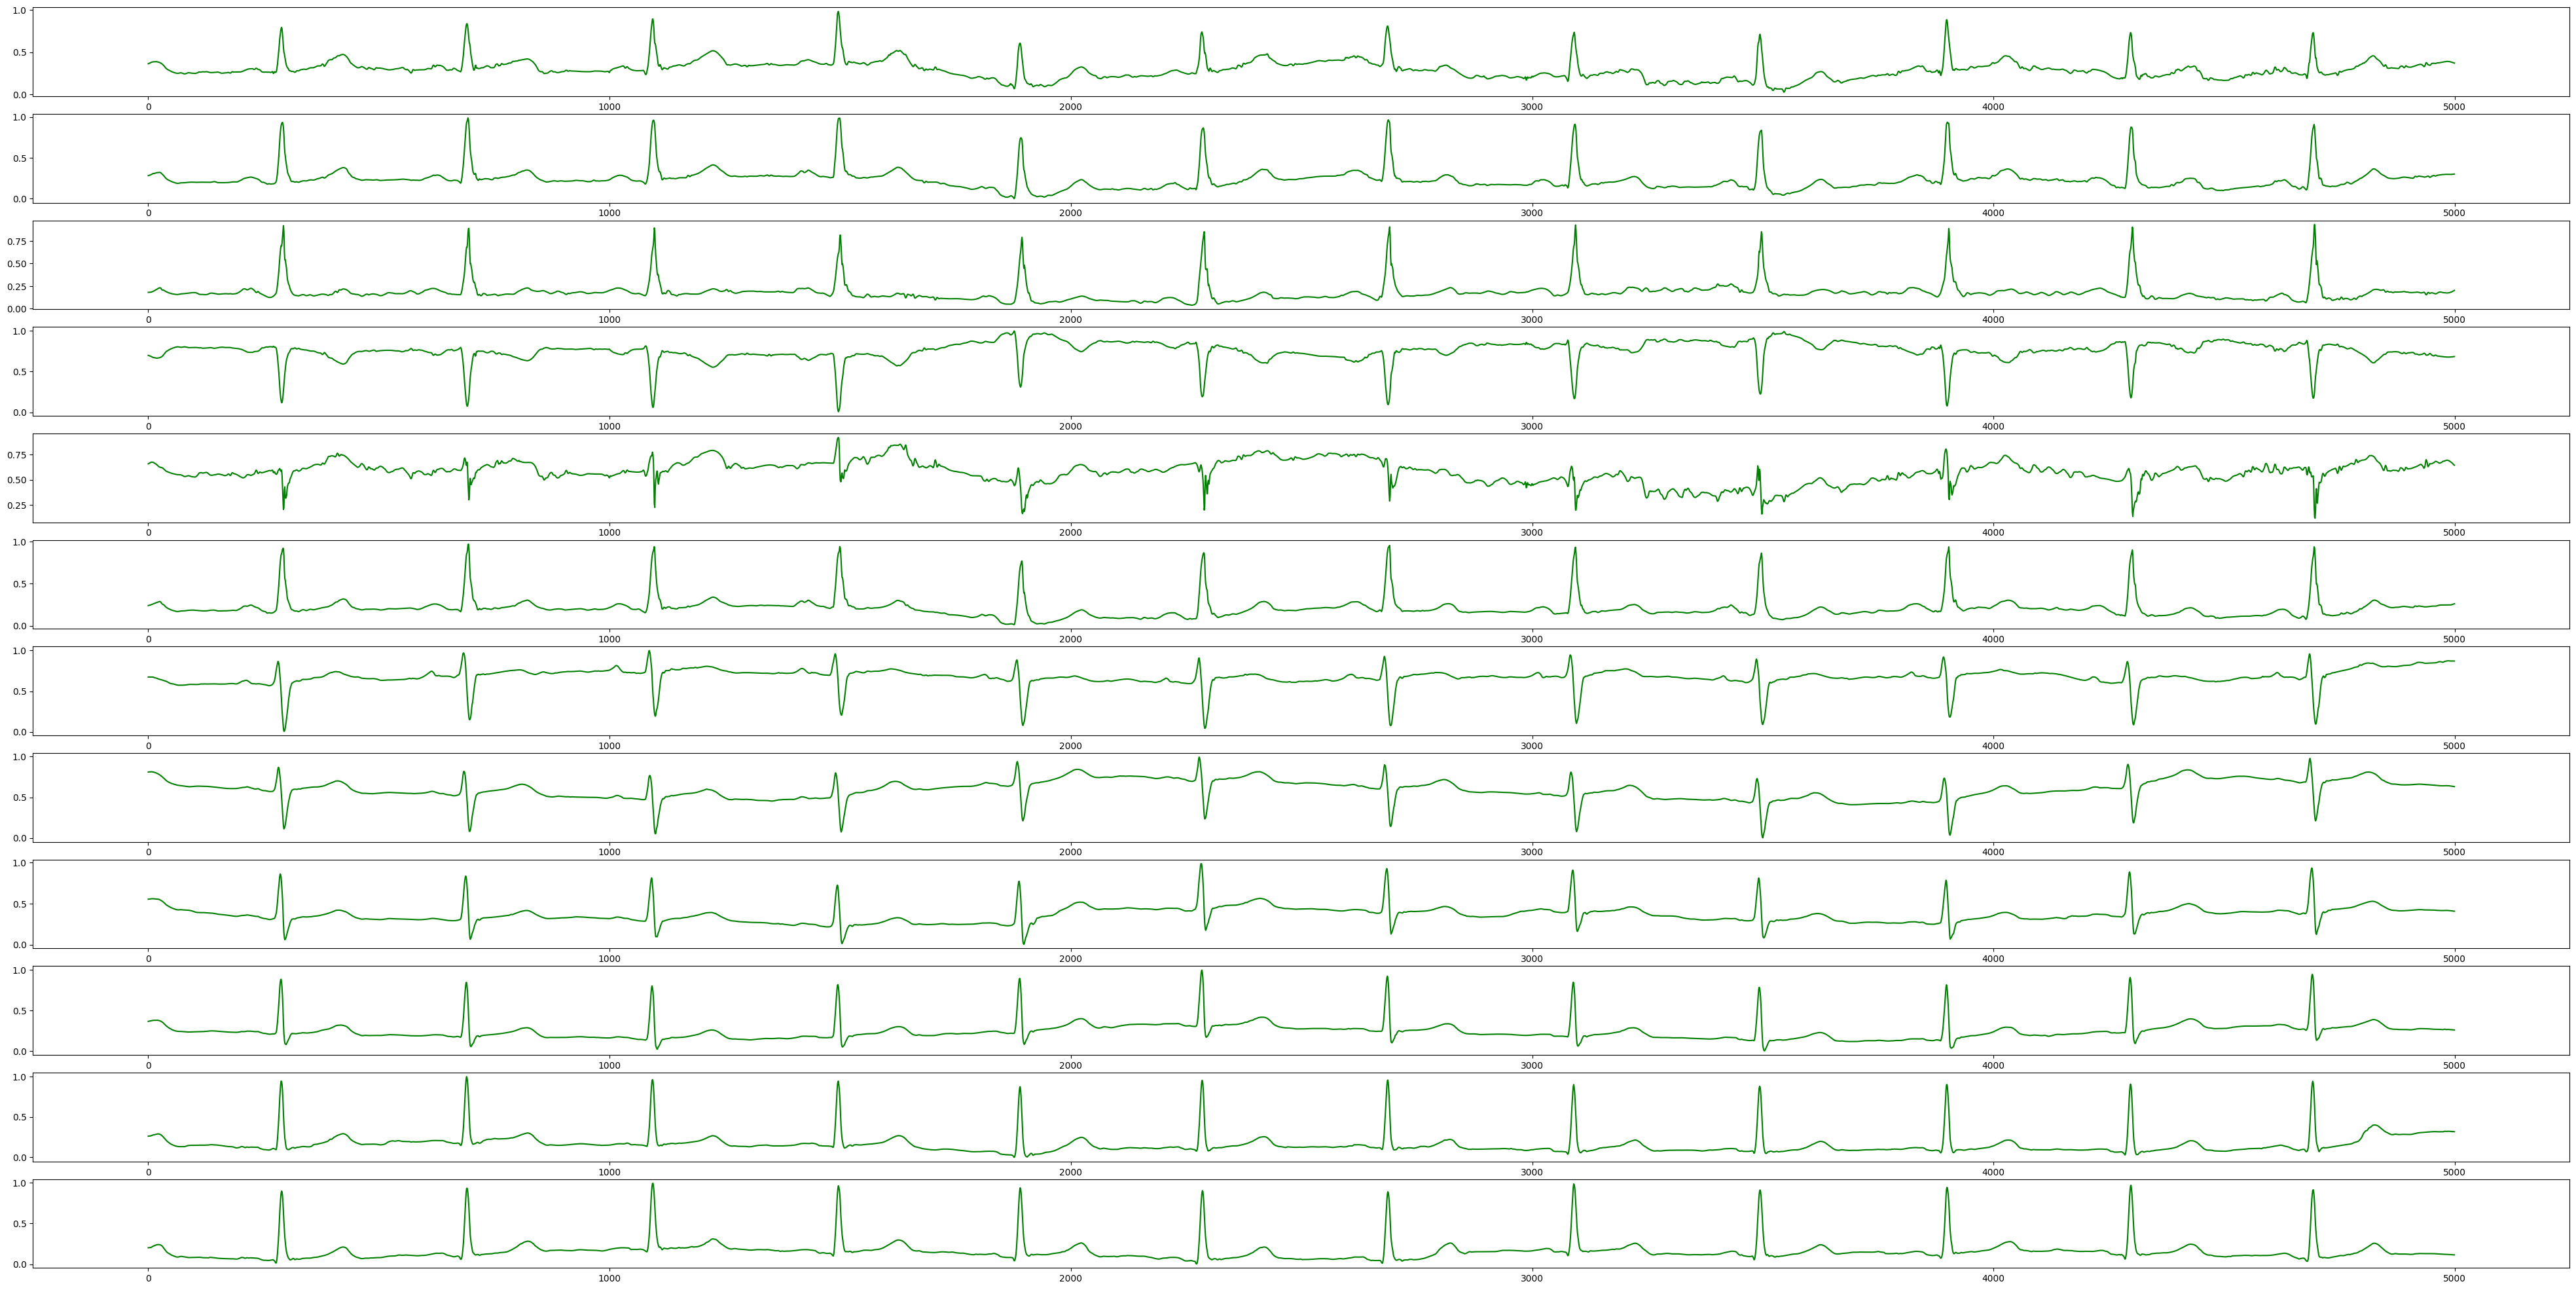

In [13]:
ecgg = wfdb.io.rdrecord(Normal_Sinus_Rhythm[2])
sig = ecgg.__dict__['p_signal']
plt.figure(figsize=(50, 25))
for i in range(12):
    plt.subplot(12,1, i + 1)
    # plt.plot(tfm.calc_baseline(tfm.normalize(sig[:, i])), color='b')
    # plt.plot(tfm.normalize(sig[:, i]),color='r')
    plt.plot(tfm.powerline(tfm.normalize(sig[:, i])), color='g')

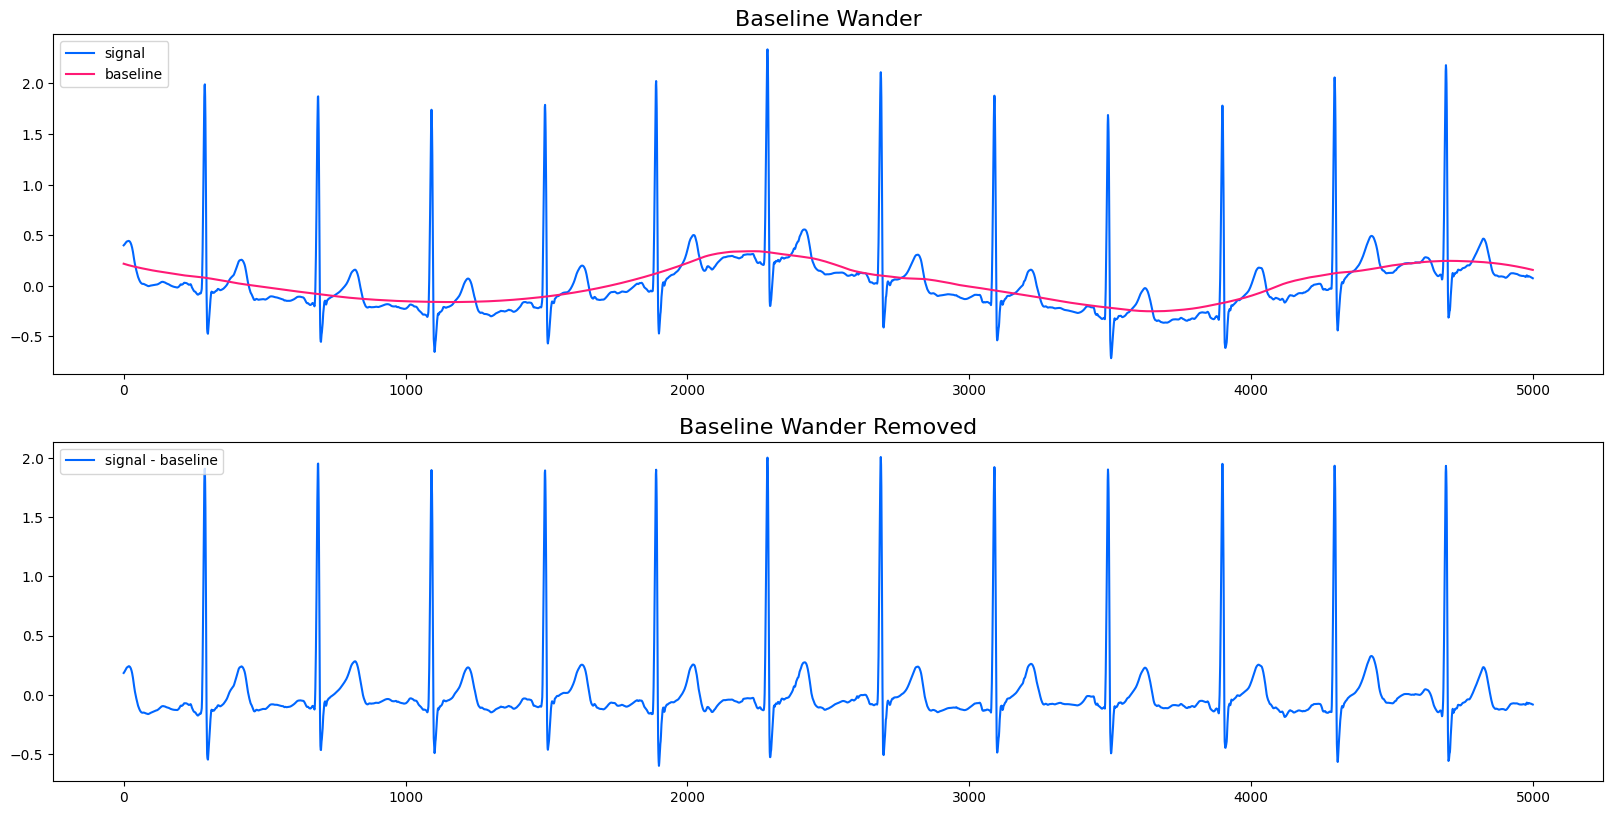

In [14]:
# Denoise the signal

# 1. Remove Baseline Wander
import sys
import pywt


def calc_baseline(signal):
    """
    Calculate the baseline of signal.

    Args:
        signal (numpy 1d array): signal whose baseline should be calculated


    Returns:
        baseline (numpy 1d array with same size as signal): baseline of the signal
    """
    ssds = np.zeros((3))

    cur_lp = np.copy(signal)
    iterations = 0
    while True:
        # Decompose 1 level
        lp, hp = pywt.dwt(cur_lp, "db4")

        # Shift and calculate the energy of detail/high pass coefficient
        ssds = np.concatenate(([np.sum(hp ** 2)], ssds[:-1]))

        # Check if we are in the local minimum of energy function of high-pass signal
        if ssds[2] > ssds[1] and ssds[1] < ssds[0]:
            break

        cur_lp = lp[:]
        iterations += 1

    # Reconstruct the baseline from this level low pass signal up to the original length
    baseline = cur_lp[:]
    for _ in range(iterations):
        baseline = pywt.idwt(baseline, np.zeros((len(baseline))), "db4")

    return baseline[: len(signal)]

signal = sig[:,9]
baseline = calc_baseline(signal)


ecg_out = signal - baseline

plt.figure(figsize=(20, 15))
plt.subplot(3, 1, 1)
plt.plot(tfm.powerline(signal),color = '#0066ff', label="signal")
plt.plot(baseline, color = '#ff1a75', label="baseline")
plt.title("Baseline Wander",fontsize=16)
plt.legend(loc='upper left')

plt.subplot(3, 1, 2)
plt.plot(tfm.powerline(ecg_out),color = '#0066ff', label="signal - baseline")
plt.title("Baseline Wander Removed",fontsize=16)
plt.legend(loc='upper left')

# plt.subplot(3, 1, 3)
# plt.plot(sig[:,9])
# plt.legend()
# plt.show()

# plt.plot(a1)

# 2. Remove Powerline Interference
# 3. Remove Muscle Artifacts
# 4. Remove High Frequency Noise


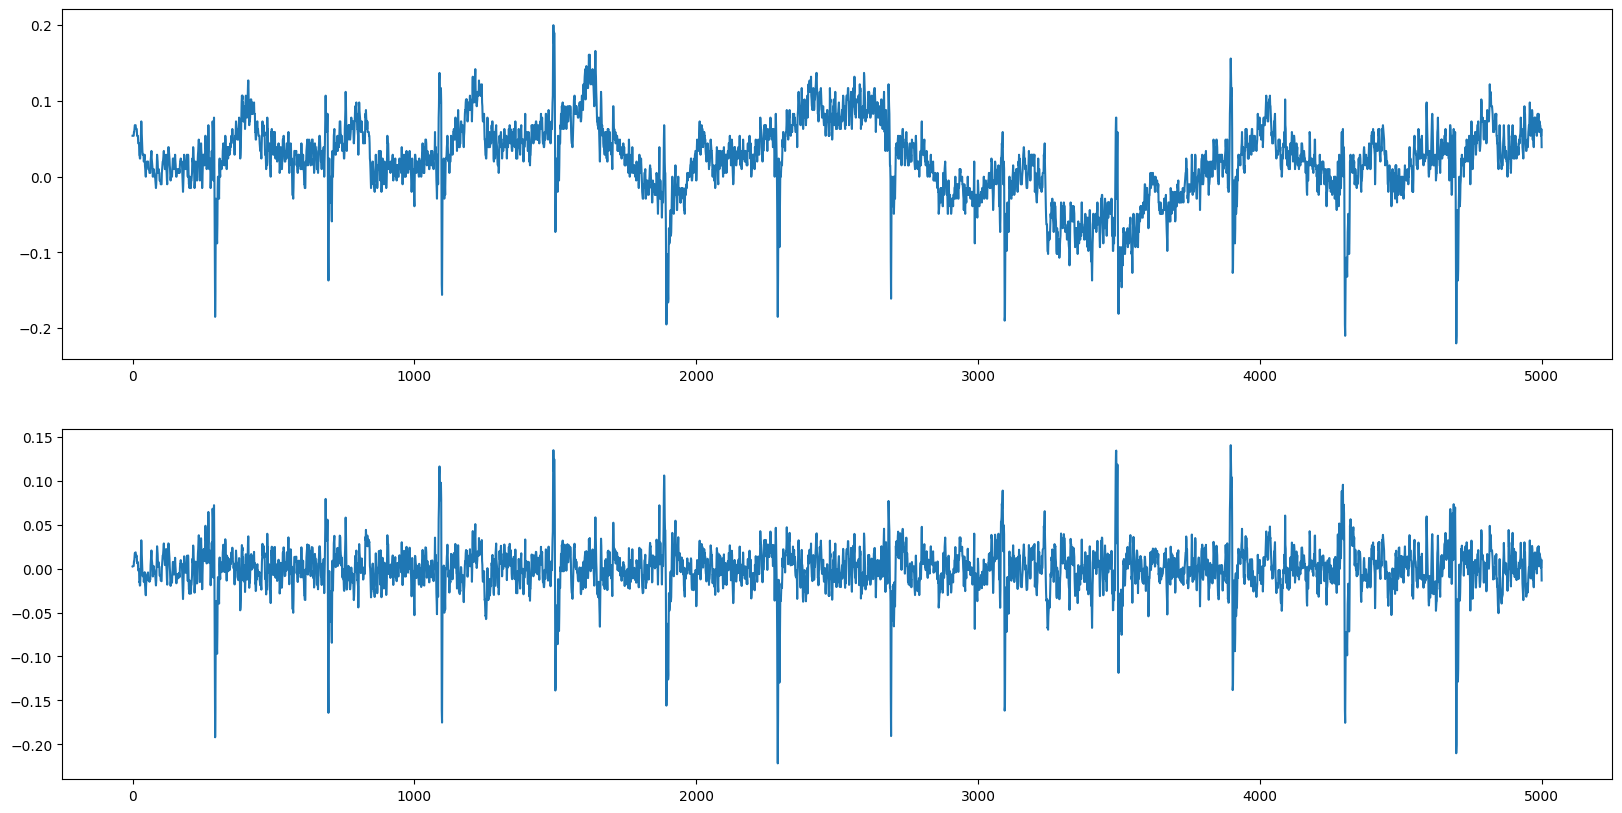

In [15]:
ecg_ = tfm.normalize(sig[:,4])
ecg_ = tfm.calc_baseline(sig[:,4])
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.plot(sig[:,4])
plt.subplot(2, 1, 2)
plt.plot(ecg_)
plt.show()

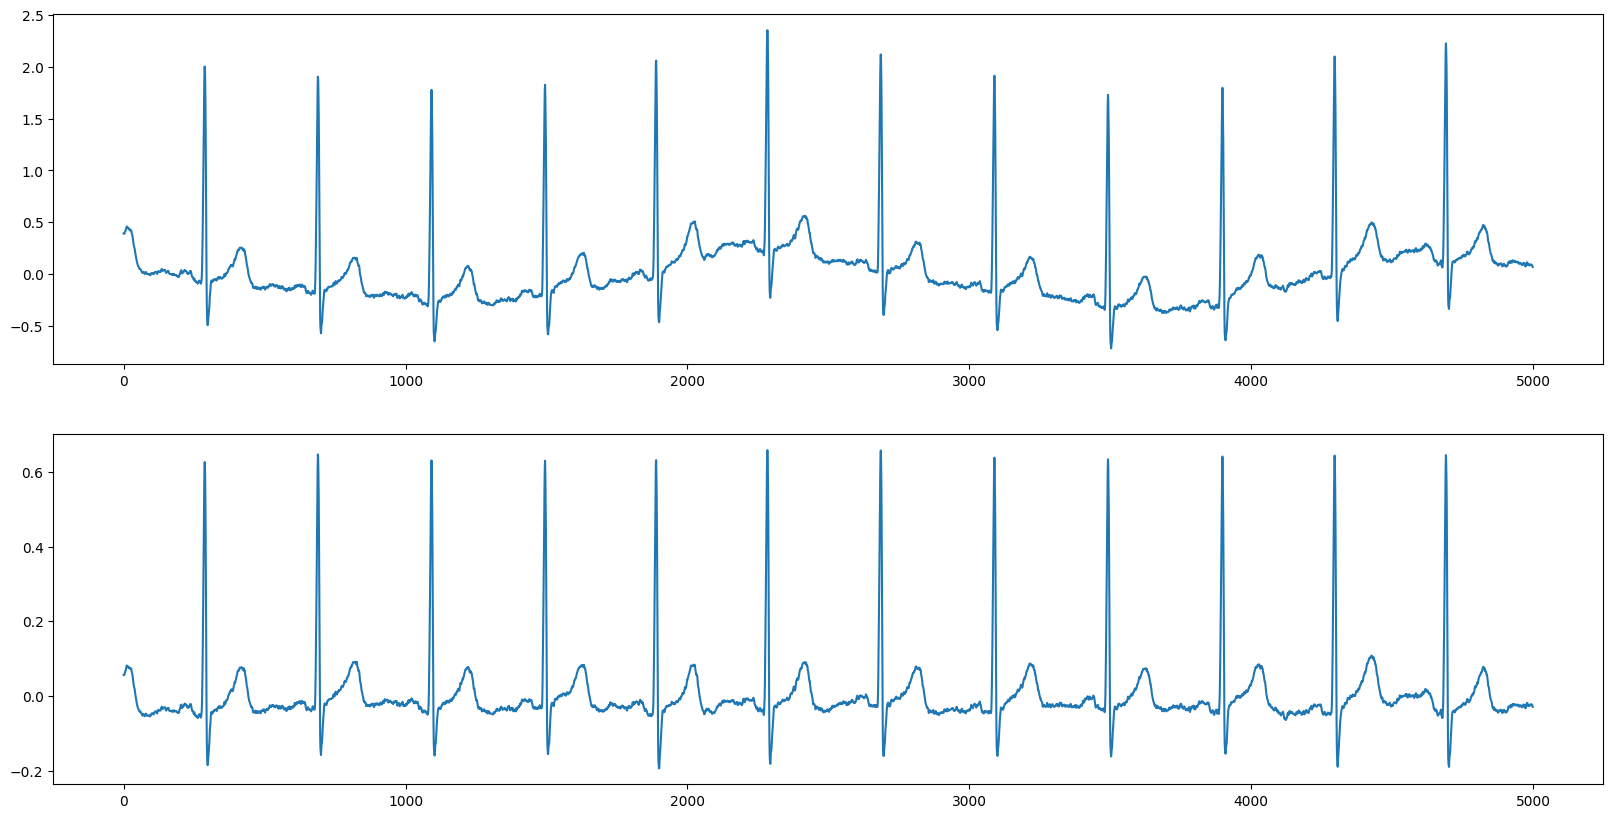

In [16]:
import transformations as tfm
ecg_ = sig[:,9]
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.plot(ecg_)
ecg_ = tfm.normalize(sig[:,9])
ecg_ = tfm.calc_baseline(ecg_)
plt.subplot(2, 1, 2)
plt.plot(ecg_)
plt.show()

e:\Arrythmia\Arrhythmia_env\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


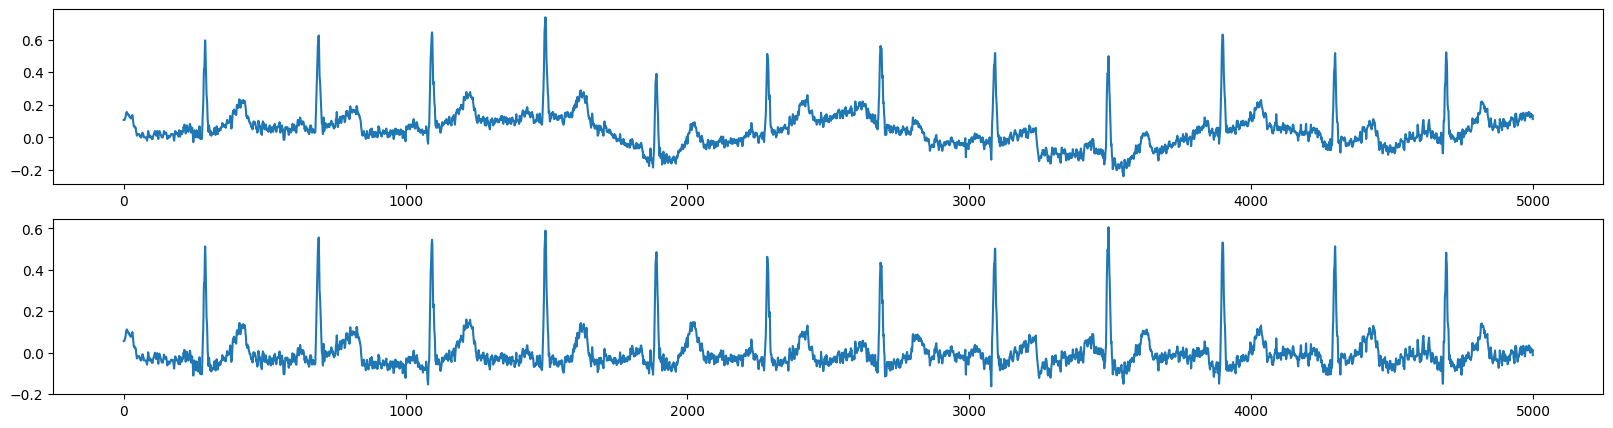

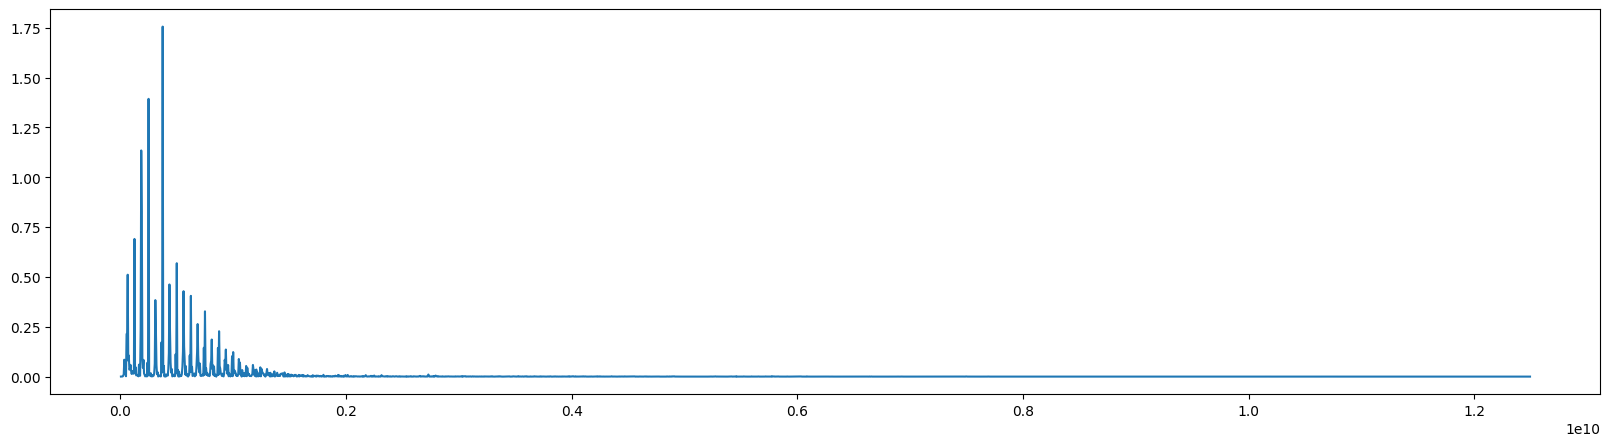

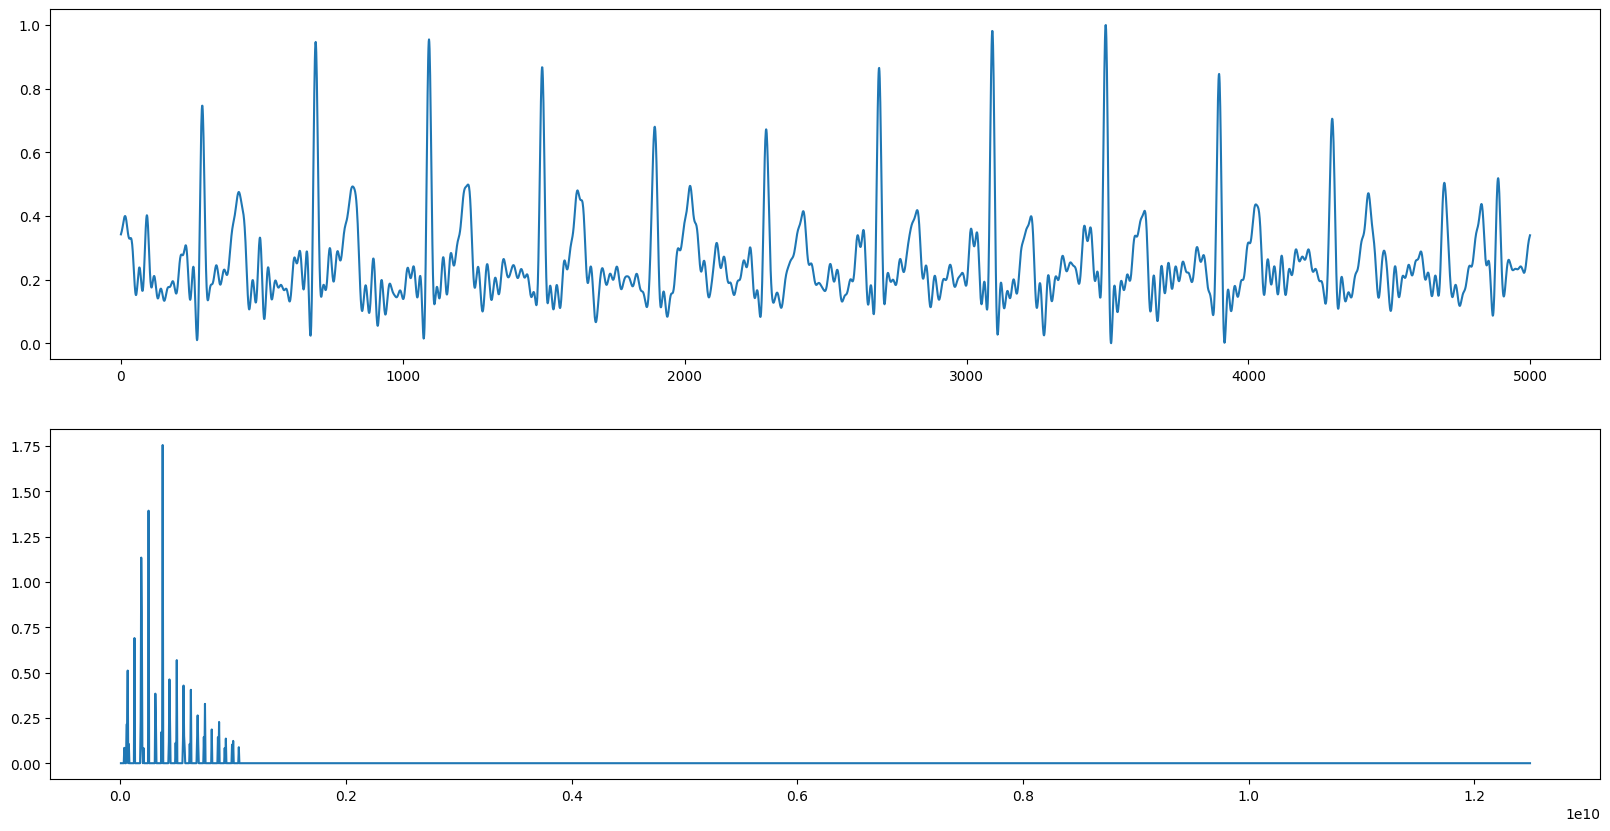

In [17]:
import tensorflow as tf
ekg = sig[:,0]
plt.figure(figsize=(20, 5))
plt.subplot(2, 1, 1)
plt.plot(ekg)
ekg = tfm.normalize(ekg)
ekg = tfm.calc_baseline(ekg)
plt.subplot(2, 1, 2)
plt.plot(ekg)
stft = np.fft.fft(ekg,len(ekg))
psd = stft * np.conj(stft) / len(ekg)
dt = 1 / 1000
freq = ( 1 / dt*len(ekg)) * np.arange(len(ekg))
L = np.arange(1, np.floor(len(ekg) / 2), dtype='int')
plt.figure(figsize=(20, 5))
plt.plot(freq[L], psd[L])
plt.show()
indices = psd > 0.08
psdclean = psd * indices
stft = indices * stft
ekgclean = np.fft.ifft(stft)
ekgclean = np.real(ekgclean)
ekgclean = tfm.normalize(ekgclean)
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.plot(ekgclean)
# plt.plot(tfm.normalize(ekg))
plt.subplot(2, 1, 2)
plt.plot(freq[L], psdclean[L])
plt.show()
#

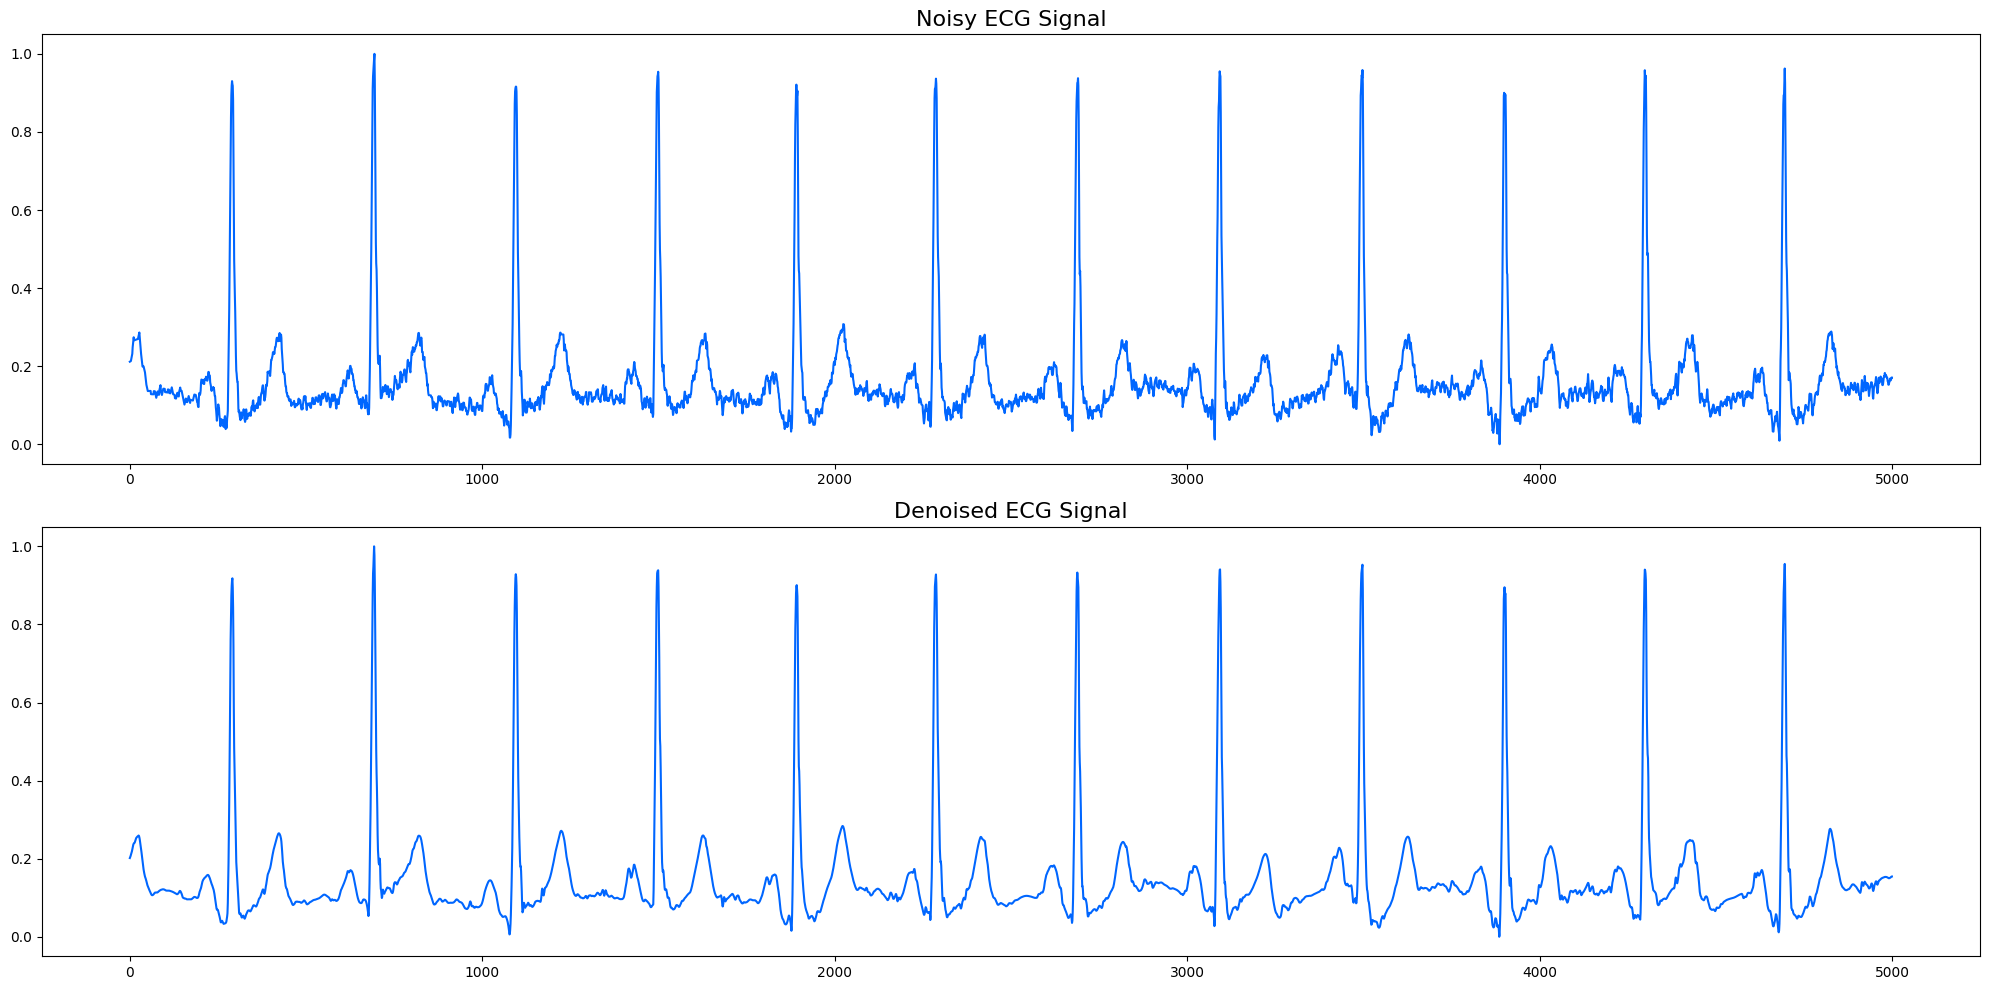

In [18]:
wavelet_name = 'db4'  # Wavelet name (you can choose a different one)
level = 4  # Decomposition level
coeffs = pywt.wavedec(sig[:,1], wavelet_name, level=level)
# threshold = 1 * np.max(coeffs[-1])

threshold = np.std(coeffs[-1]) * np.sqrt(2 * np.log(len(sig[:,1])))
coeffs[1:] = (pywt.threshold(c, threshold, mode='soft') for c in coeffs[1:])
denoised_ecg_signal = pywt.waverec(coeffs, wavelet_name)

# Plot the original, noisy, and denoised ECG signals
plt.figure(figsize=(20,10))

plt.subplot(2, 1, 1)
plt.plot(tfm.normalize(tfm.calc_baseline(sig[:,1])), color='#0066ff')
plt.title('Noisy ECG Signal',fontsize=16)
plt.subplot(2, 1, 2)
# plt.plot(tfm.normalize(tfm.calc_baseline(tfm.powerline(sig[:,0]))), color='g')
plt.plot(tfm.normalize(tfm.calc_baseline(denoised_ecg_signal)), color='#0066ff')
plt.title('Denoised ECG Signal', fontsize=16)
plt.tight_layout()
plt.show()

In [19]:
print(coeffs[-1],threshold)

[-0.  0.  0. ... -0. -0.  0.] 0.02750648488122476


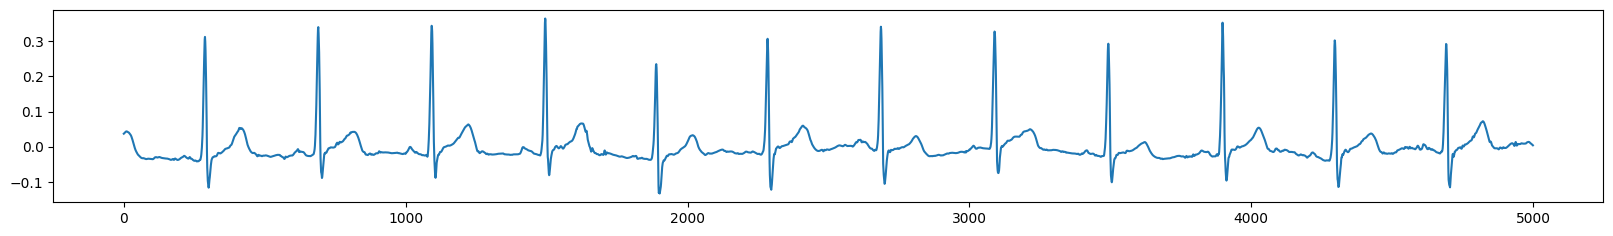

In [20]:
# Calculate RMS of the signal of all 12 leads

# rms = np.array([])
rms = np.zeros([len(sig[:, 0])])

tempp = np.zeros((12, len(sig[:, 0])))
for i in range(12):
    tempp[i] = tfm.normalize(tfm.powerline(sig[:, i])) ** 2

for i in range(len(sig[:, 0])):

    rms[i] = np.sqrt(np.mean(tempp[:, i]))


# Plot the RMS of the signal of all 12 leads

plt.figure(figsize=(20, 2.5))
plt.plot(tfm.calc_baseline(rms))
plt.show()

In [21]:
rms = np.zeros([len(sig[:, 0])])

print(rms,tempp[:, 5],np.mean(tempp[:, 5]),np.sqrt(np.mean(tempp[:, 5])))
# np.append(rms[5], np.array(np.mean(tempp[:, 5])))
rms[5] = np.sqrt(np.mean(tempp[:, 5]))
print(rms[5])

[0. 0. 0. ... 0. 0. 0.] [0.13375058 0.08676685 0.02584799 0.47232998 0.47814041 0.0604803
 0.4510302  0.66924156 0.31691044 0.13774481 0.07079352 0.04105305] 0.24534080797358918 0.4953188952317377
0.4953188952317377


In [22]:
ecgg = wfdb.io.rdrecord(Atrial_Flutter[4])
sig = ecgg.__dict__['p_signal']

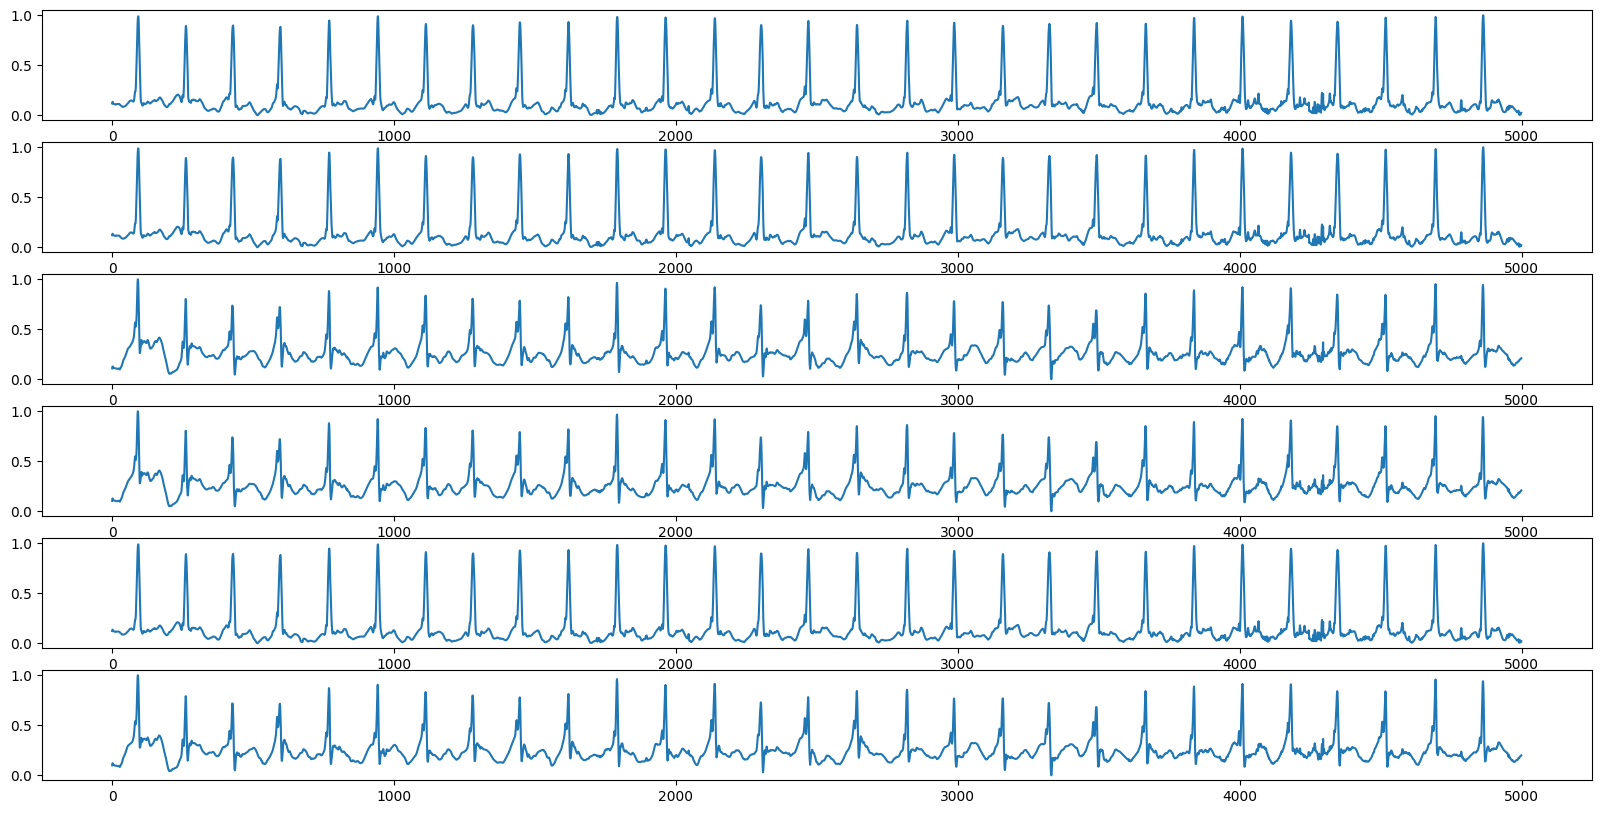

In [23]:
plt.figure(figsize=(20, 10))

plt.subplot(6, 1, 1)
rms = np.zeros([len(sig[:, 0])])
tempp = np.zeros((12, len(sig[:, 0])))
for i in range(12):
    tempp[i] = tfm.powerline(tfm.calc_baseline(tfm.normalize(sig[:, i]))) ** 2
for i in range(len(sig[:, 0])):
    rms[i] = np.sqrt(np.mean(tempp[:, i]))
# plt.plot(tfm.powerline(tfm.calc_baseline(tfm.normalize(sig[:, 0]))))
plt.plot(tfm.normalize(rms))

plt.subplot(6, 1, 2)
rms = np.zeros([len(sig[:, 0])])
tempp = np.zeros((12, len(sig[:, 0])))
for i in range(12):
    tempp[i] = tfm.calc_baseline(tfm.powerline(tfm.normalize(sig[:, i]))) ** 2
for i in range(len(sig[:, 0])):
    rms[i] = np.sqrt(np.mean(tempp[:, i]))
# plt.plot(tfm.calc_baseline(tfm.powerline(tfm.normalize(sig[:, 0]))))
plt.plot(tfm.normalize(rms))

plt.subplot(6, 1, 3)
rms = np.zeros([len(sig[:, 0])])
tempp = np.zeros((12, len(sig[:, 0])))
for i in range(12):
    tempp[i] = tfm.powerline(tfm.normalize(tfm.calc_baseline(sig[:, i]))) ** 2
for i in range(len(sig[:, 0])):
    rms[i] = np.sqrt(np.mean(tempp[:, i]))
# plt.plot(tfm.powerline(tfm.normalize(tfm.calc_baseline(sig[:, 0]))))
plt.plot(tfm.normalize(rms))

plt.subplot(6, 1, 4)
rms = np.zeros([len(sig[:, 0])])
tempp = np.zeros((12, len(sig[:, 0])))
for i in range(12):
    tempp[i] = tfm.normalize(tfm.powerline(tfm.calc_baseline(sig[:, i]))) ** 2
for i in range(len(sig[:, 0])):
    rms[i] = np.sqrt(np.mean(tempp[:, i]))
# plt.plot(tfm.normalize(tfm.powerline(tfm.calc_baseline(sig[:, 0]))))
plt.plot(tfm.normalize(rms))

plt.subplot(6, 1, 5)
rms = np.zeros([len(sig[:, 0])])
tempp = np.zeros((12, len(sig[:, 0])))
for i in range(12):
    tempp[i] = tfm.calc_baseline(tfm.normalize(tfm.powerline(sig[:, i]))) ** 2
for i in range(len(sig[:, 0])):
    rms[i] = np.sqrt(np.mean(tempp[:, i]))
# plt.plot(tfm.calc_baseline(tfm.normalize(tfm.powerline(sig[:, 0]))))
plt.plot(tfm.normalize(rms))

plt.subplot(6, 1, 6)
rms = np.zeros([len(sig[:, 0])])
tempp = np.zeros((12, len(sig[:, 0])))
for i in range(12):
    tempp[i] = tfm.normalize(tfm.calc_baseline(tfm.powerline(sig[:, i]))) ** 2
for i in range(len(sig[:, 0])):
    rms[i] = np.sqrt(np.mean(tempp[:, i]))
# plt.plot(tfm.normalize(tfm.calc_baseline(tfm.powerline(sig[:, 0]))))
plt.plot(tfm.normalize(rms))

plt.show()


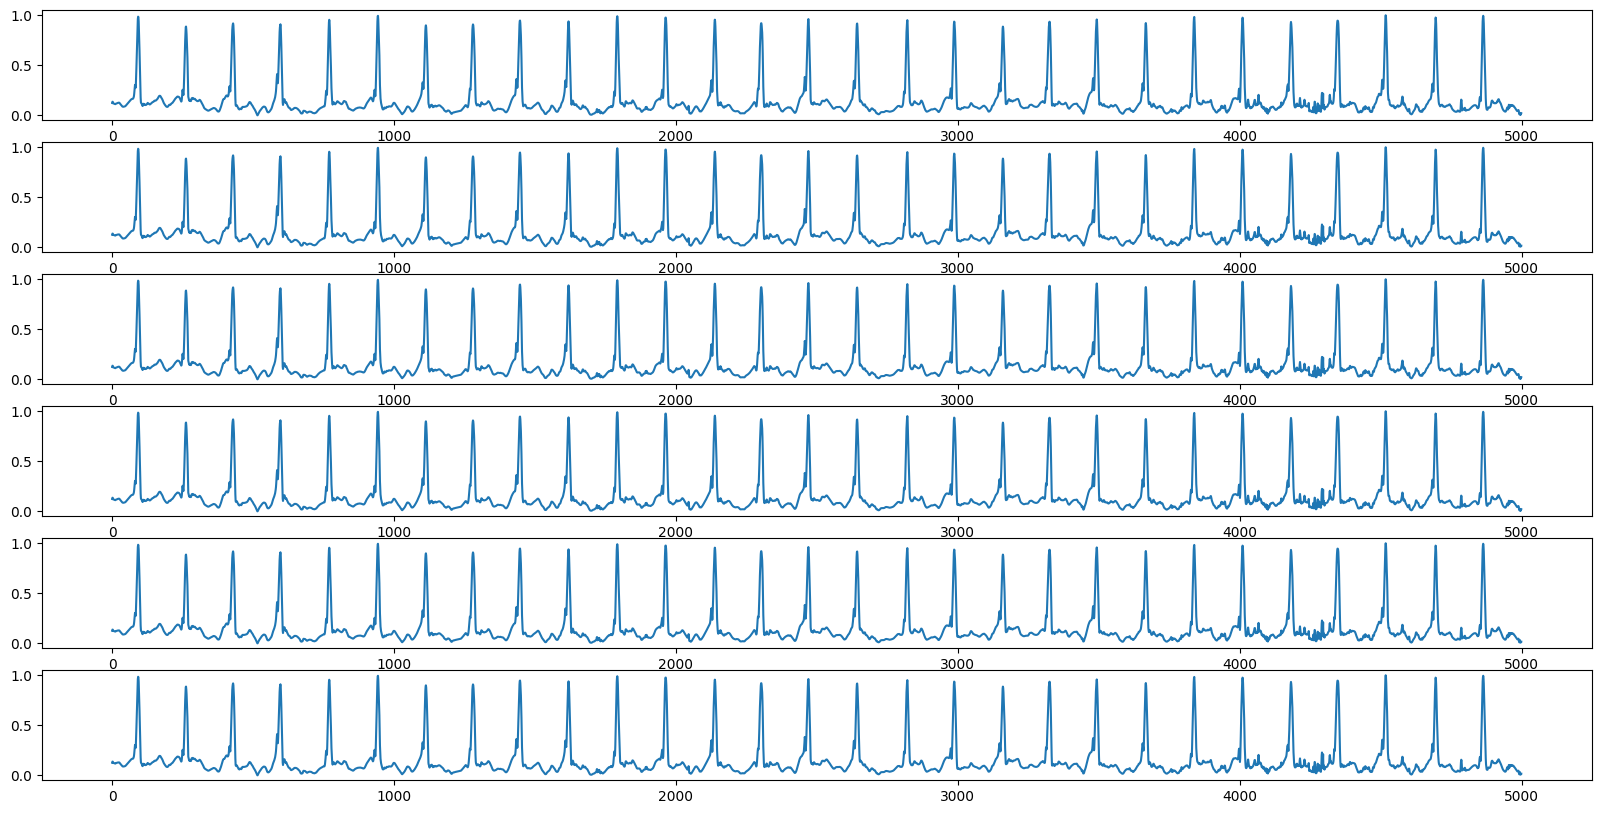

In [24]:
plt.figure(figsize=(20, 10))

plt.subplot(6, 1, 1)
rms = np.zeros([len(sig[:, 0])])
tempp = np.zeros((12, len(sig[:, 0])))
for i in range(12):
    tempp[i] = tfm.powerline(tfm.calc_baseline((sig[:, i]))) ** 2
for i in range(len(sig[:, 0])):
    rms[i] = np.sqrt(np.mean(tempp[:, i]))
# plt.plot(tfm.powerline(tfm.calc_baseline(tfm.normalize(sig[:, 0]))))
plt.plot(tfm.normalize(rms))

plt.subplot(6, 1, 2)
rms = np.zeros([len(sig[:, 0])])
tempp = np.zeros((12, len(sig[:, 0])))
for i in range(12):
    tempp[i] = tfm.calc_baseline(tfm.powerline((sig[:, i]))) ** 2
for i in range(len(sig[:, 0])):
    rms[i] = np.sqrt(np.mean(tempp[:, i]))
# plt.plot(tfm.calc_baseline(tfm.powerline(tfm.normalize(sig[:, 0]))))
plt.plot(tfm.normalize(rms))

plt.subplot(6, 1, 3)
rms = np.zeros([len(sig[:, 0])])
tempp = np.zeros((12, len(sig[:, 0])))
for i in range(12):
    tempp[i] = tfm.powerline((tfm.calc_baseline(sig[:, i]))) ** 2
for i in range(len(sig[:, 0])):
    rms[i] = np.sqrt(np.mean(tempp[:, i]))
# plt.plot(tfm.powerline(tfm.normalize(tfm.calc_baseline(sig[:, 0]))))
plt.plot(tfm.normalize(rms))

plt.subplot(6, 1, 4)
rms = np.zeros([len(sig[:, 0])])
tempp = np.zeros((12, len(sig[:, 0])))
for i in range(12):
    tempp[i] = (tfm.powerline(tfm.calc_baseline(sig[:, i]))) ** 2
for i in range(len(sig[:, 0])):
    rms[i] = np.sqrt(np.mean(tempp[:, i]))
# plt.plot(tfm.normalize(tfm.powerline(tfm.calc_baseline(sig[:, 0]))))
plt.plot(tfm.normalize(rms))

plt.subplot(6, 1, 5)
rms = np.zeros([len(sig[:, 0])])
tempp = np.zeros((12, len(sig[:, 0])))
for i in range(12):
    tempp[i] = tfm.calc_baseline((tfm.powerline(sig[:, i]))) ** 2
for i in range(len(sig[:, 0])):
    rms[i] = np.sqrt(np.mean(tempp[:, i]))
# plt.plot(tfm.calc_baseline(tfm.normalize(tfm.powerline(sig[:, 0]))))
plt.plot(tfm.normalize(rms))

plt.subplot(6, 1, 6)
rms = np.zeros([len(sig[:, 0])])
tempp = np.zeros((12, len(sig[:, 0])))
for i in range(12):
    tempp[i] = (tfm.calc_baseline(tfm.powerline(sig[:, i]))) ** 2
for i in range(len(sig[:, 0])):
    rms[i] = np.sqrt(np.mean(tempp[:, i]))
# plt.plot(tfm.normalize(tfm.calc_baseline(tfm.powerline(sig[:, 0]))))
plt.plot(tfm.normalize(rms))

plt.show()


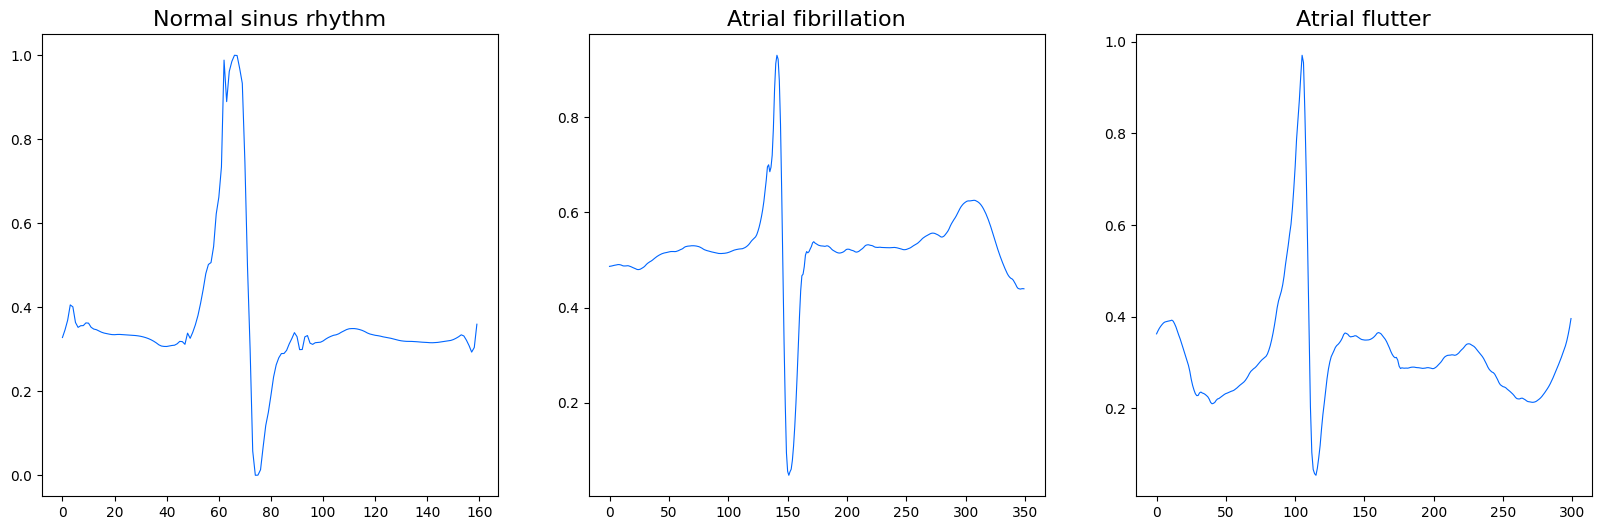

In [33]:
ecg1 = wfdb.io.rdrecord(Normal_Sinus_Rhythm[5])
sig1 = ecg1.__dict__['p_signal']
ecg2 = wfdb.io.rdrecord(Atrial_Fibrillation[5])
sig2 = ecg2.__dict__['p_signal']
ecg3 = wfdb.io.rdrecord(Atrial_Flutter[5])
sig3 = ecg3.__dict__['p_signal']
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.title('Normal sinus rhythm', fontsize=16)
plt.plot(tfm.normalize(tfm.all_transform(sig1[250:410])), lw = 0.8,label='Raw',color = '#0066ff')
# plt.plot(tfm.normalize(tfm.calc_baseline(tfm.powerline(sig[150:600, 1]))), label='II', lw = 0.5)
# plt.plot(tfm.normalize(tfm.calc_baseline(tfm.powerline(sig[150:600, 2]))), label='III', lw = 0.5)
# plt.plot(tfm.normalize(tfm.calc_baseline(tfm.powerline(sig[150:600, 3]))), label='aVR', lw = 0.5)
# plt.plot(tfm.normalize(tfm.calc_baseline(tfm.powerline(sig[150:600, 4]))), label='aVL', lw = 0.5)
# plt.plot(tfm.normalize(tfm.calc_baseline(tfm.powerline(sig[150:600, 5]))), label='aVF', lw = 0.5)
# plt.plot(tfm.normalize(tfm.calc_baseline(tfm.powerline(sig[150:600, 6]))), label='V1', lw = 0.5)
# plt.plot(tfm.normalize(tfm.calc_baseline(tfm.powerline(sig[150:600, 7]))), label='V2', lw = 0.5)
# plt.plot(tfm.normalize(tfm.calc_baseline(tfm.powerline(sig[150:600, 8]))), label='V3', lw = 0.5)
# plt.plot(tfm.normalize(tfm.calc_baseline(tfm.powerline(sig[150:600, 9]))), label='V4', lw = 0.5)
# plt.plot(tfm.normalize(tfm.calc_baseline(tfm.powerline(sig[150:600, 10]))), label='V5', lw = 0.5)
# plt.plot(tfm.normalize(tfm.calc_baseline(tfm.powerline(sig[150:600, 11]))), label='V6', lw = 0.5)
# plt.legend(fontsize = 14)
plt.subplot(1, 3, 2)
plt.title('Atrial fibrillation', fontsize = 16)
plt.plot(tfm.normalize(tfm.all_transform(sig2))[350:700],color = '#0066ff' , label='Normalized', lw = 0.8)
# plt.legend(fontsize = 14)
plt.subplot(1, 3, 3)
plt.title('Atrial flutter', fontsize = 16)

plt.plot(tfm.normalize(tfm.all_transform(sig3))[150:450],color = '#0066ff' , label='Normalized', lw = 0.8)

plt.show()

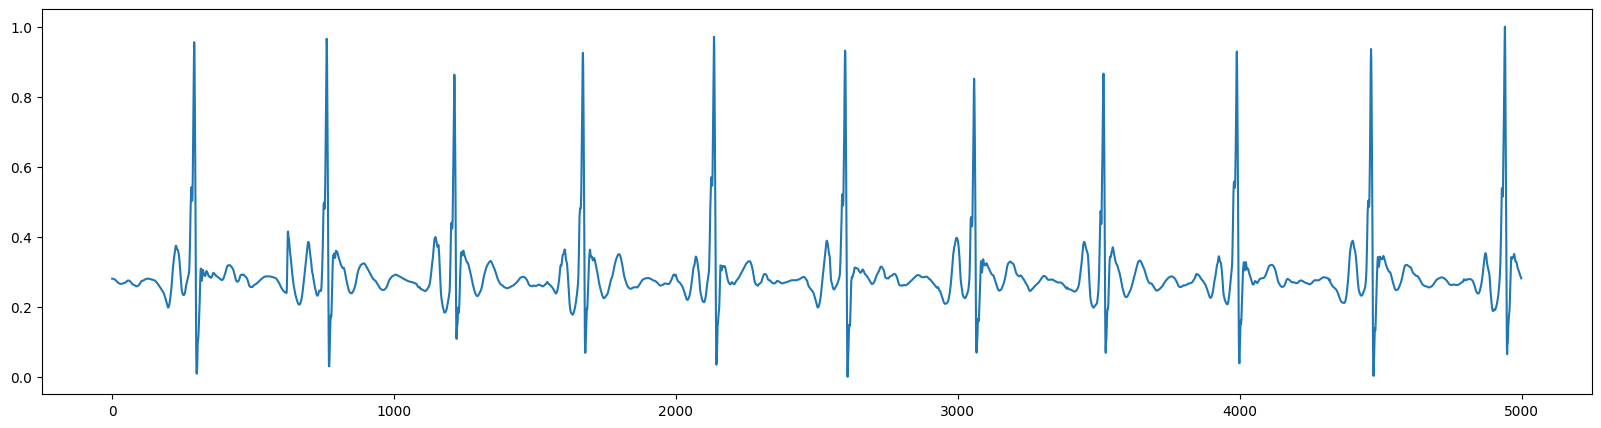

In [26]:
def all_transform(signal):
    rms = np.zeros([len(signal[:, 0])])

    tempp = np.zeros((12, len(signal[:, 0])))
    for i in range(12):
        tempp[i] = tfm.normalize(tfm.calc_baseline(tfm.powerline(signal[:, i]))) ** 2

    for i in range(len(signal[:, 0])):

        rms[i] = np.sqrt(np.mean(tempp[:, i]))
    rms = tfm.normalize(rms)
    return rms
ecgg = wfdb.io.rdrecord(Normal_Sinus_Rhythm[289])
sig = ecgg.__dict__['p_signal']
plt.figure(figsize=(20, 5))
plt.plot(all_transform(sig))
plt.show()

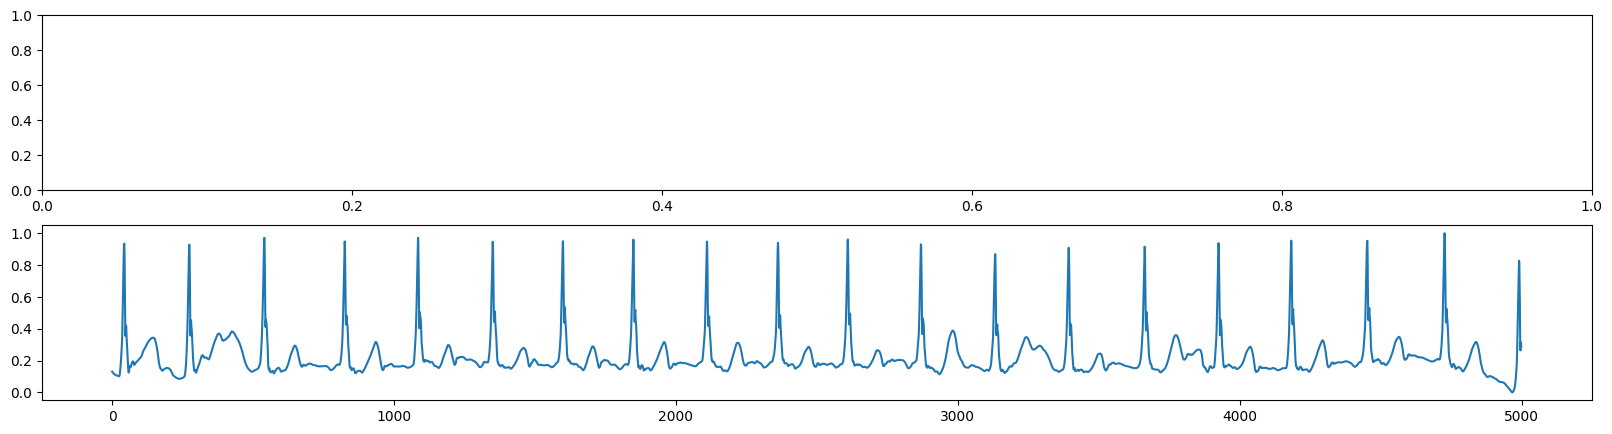

In [27]:
import transformations as tfm
kkk = wfdb.io.rdrecord(Normal_Sinus_Rhythm[393])
kkk.__dict__['p_signal'].shape
# kkk = tfm.all_transform(kkk.__dict__['p_signal'])
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
# plt.plot(tfm.normalize(tfm.calc_baseline(tfm.powerline(kkk.__dict__['p_signal'][:,0]))))
# plt.plot(tfm.all_transform(kkk.__dict__['p_signal']))
plt.subplot(2,1,2)

plt.plot(tfm.normalize(tfm.calc_baseline(tfm.powerline(tfm.rms_transform(kkk.__dict__['p_signal'])))))



In [28]:
break
Normal_Sinus_rhythm_trace = []
Atrial_Fibrillation_trace = []
Atrial_Flutter_trace = []
errors = [288,393,1170,1175,1200,1218,1251,1255,1261,1265,1285,1287,1298,1335,1352,1375,1396,1420,1431,1450,1468,1497,1503,1507,1509,1542,1562,1566,1582,1604,1605,1622,1651,1662,1663,1682,2361,2376,2612,2623]
for i in range(len(Normal_Sinus_Rhythm)):
    temp3 = wfdb.io.rdrecord(Normal_Sinus_Rhythm[i])
    temp4 = temp3.__dict__['p_signal']
    temp4 = all_transform(temp4)
    Normal_Sinus_rhythm_trace.append(temp4)
with h5py.File('E:/Arrythmia/Converted data/Normal sinus rhythm/' + 'Normal_Sinus_rhythm', 'w') as hf:
    hf.create_dataset("Normal_Sinus_rhythm_trace", data=Normal_Sinus_rhythm_trace)
    hf.close()
del Normal_Sinus_rhythm_trace
gc.collect()

for i in range(len(Atrial_Fibrillation)):
    temp3 = wfdb.io.rdrecord(Atrial_Fibrillation[i])
    temp4 = temp3.__dict__['p_signal']
    temp4 = all_transform(temp4)
    Atrial_Fibrillation_trace.append(temp4)
with h5py.File('E:/Arrythmia/Converted data/Atrial fibrillation/' + 'Atrial_Fibrillation', 'w') as hf:
    hf.create_dataset("Atrial_Fibrillation_trace", data=Atrial_Fibrillation_trace)
    hf.close()
del Atrial_Fibrillation_trace
gc.collect()

for i in range(len(Atrial_Flutter)):
    temp3 = wfdb.io.rdrecord(Atrial_Flutter[i])
    temp4 = temp3.__dict__['p_signal']
    temp4 = all_transform(temp4)
    Atrial_Flutter_trace.append(temp4)
with h5py.File('E:/Arrythmia/Converted data/Atrial flutter/' + 'Atrial_Flutter', 'w') as hf:
    hf.create_dataset("Atrial_Flutter_trace", data=Atrial_Flutter_trace)
    hf.close()
del Atrial_Flutter_trace
gc.collect()

SyntaxError: 'break' outside loop (1998701903.py, line 1)

In [ ]:
# print(np.array(Normal_Sinus_rhythm_trace).shape,np.array(Normal_Sinus_Rhythm).shape[0])
print(signal.shape)

In [ ]:
del Normal_Sinus_rhythm_trace
gc.collect()

In [ ]:
Normal_Sinus_rhythm_trace = []
for i in range(len(Normal_Sinus_Rhythm)):
    temp3 = wfdb.io.rdrecord(Normal_Sinus_Rhythm[i])
    temp4 = temp3.__dict__['p_signal']
    temp4 = all_transform(temp4)
    Normal_Sinus_rhythm_trace.append(temp4)
    print(i)

In [ ]:
with h5py.File('E:/Arrythmia/Converted data/Normal sinus rhythm/' + 'Normal_Sinus_rhythm', 'w') as hf:
    hf.create_dataset("Normal_Sinus_rhythm_trace", shape = (0,5000),maxshape = (None,None))
    hf.close()
with h5py.File('E:/Arrythmia/Converted data/Atrial fibrillation/' + 'Atrial_Fibrillation', 'w') as hf:
    hf.create_dataset("Atrial_Fibrillation_trace", shape = (0,5000),maxshape = (None,5000))
    hf.close()
with h5py.File('E:/Arrythmia/Converted data/Atrial flutter/' + 'Atrial_Flutter', 'w') as hf:
    hf.create_dataset("Atrial_Flutter_trace", shape = (0,5000),maxshape = (None,5000))
    hf.close()

for i in range(len(Normal_Sinus_Rhythm)):
    with h5py.File('E:/Arrythmia/Converted data/Normal sinus rhythm/' + 'Normal_Sinus_rhythm', 'a') as file:
        file["Normal_Sinus_rhythm_trace"].resize((file["Normal_Sinus_rhythm_trace"].shape[0] + 1), axis=0)
        file
        temp = wfdb.io.rdrecord(Normal_Sinus_Rhythm[i])
        temp = temp.__dict__['p_signal']
        if temp.shape[0]>5000:
            file["Normal_Sinus_rhythm_trace"].resize((temp.shape[0]), axis=1)
        try:
            temp = tfm.all_transform(temp)
        except Exception as e:
            file["Normal_Sinus_rhythm_trace"].resize((file["Normal_Sinus_rhythm_trace"].shape[0] - 1), axis=0)
            print(e)
        file["Normal_Sinus_rhythm_trace"][-1:] = temp
        del temp
        gc.collect()
        file.close()
    print(f'Normal_Sinus_rhythm_trace {i} saved')
print('- - - - - -Normal sinus rhythms saved- - - - - -')

for i in range(len(Atrial_Fibrillation)):
    with h5py.File('E:/Arrythmia/Converted data/Atrial fibrillation/' + 'Atrial_Fibrillation', 'a') as file:
        file["Atrial_Fibrillation_trace"].resize((file["Atrial_Fibrillation_trace"].shape[0] + 1), axis=0)
        temp = wfdb.io.rdrecord(Atrial_Fibrillation[i])
        temp = temp.__dict__['p_signal']
        temp = tfm.all_transform(temp)
        file["Atrial_Fibrillation_trace"][-1:] = temp
        del temp
        gc.collect()
        file.close()
    print(f'Atrial_Fibrillation_trace {i} saved')
print('- - - - - -Atrial_Fibrillation_trace saved- - - - - -')

for i in range(len(Atrial_Flutter)):
    with h5py.File('E:/Arrythmia/Converted data/Atrial flutter/' + 'Atrial_Flutter', 'a') as file:
        file["Atrial_Flutter_trace"].resize((file["Atrial_Flutter_trace"].shape[0] + 1), axis=0)
        temp = wfdb.io.rdrecord(Atrial_Flutter[i])
        temp = temp.__dict__['p_signal']
        temp = tfm.all_transform(temp)
        file["Atrial_Flutter_trace"][-1:] = temp
        del temp
        gc.collect()
        file.close()
    print(f'Atrial_Flutter_trace {i} saved')
print('- - - - - -Atrial_Flutter_trace saved- - - - - -')
print('All saved')

In [ ]:
gc.collect()

(3, 10000)


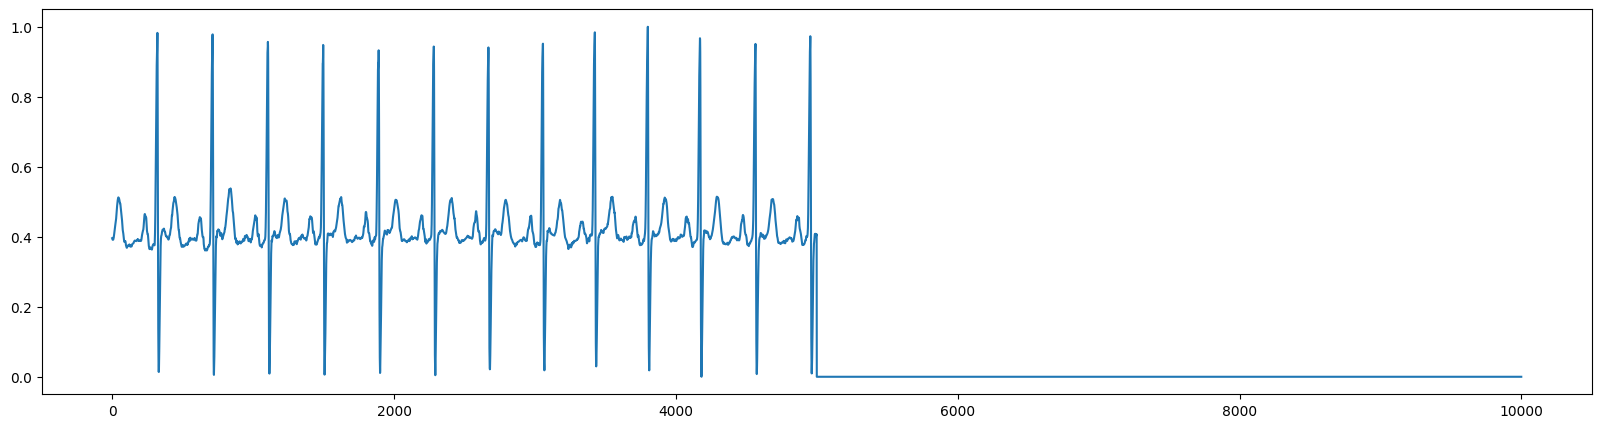

In [ ]:
with h5py.File('Normal_Sinus_rhythm', 'w') as hf:
    hf.create_dataset("Normal_Sinus_rhythm_trace", shape = (0,5000),maxshape = (None,None))
    hf.close()
for i in range(1154,1157):
    with h5py.File('Normal_Sinus_rhythm', 'a') as file:
        file["Normal_Sinus_rhythm_trace"].resize((file["Normal_Sinus_rhythm_trace"].shape[0] + 1), axis=0)
        temp = wfdb.io.rdrecord(Normal_Sinus_Rhythm[i])
        temp = temp.__dict__['p_signal']
        if temp.shape[0]>5000:
            file["Normal_Sinus_rhythm_trace"].resize((temp.shape[0]), axis=1)
        temp = all_transform(temp)

        file["Normal_Sinus_rhythm_trace"][-1:] = temp
        file.close()
with h5py.File('Normal_Sinus_rhythm', 'r') as hf:
    print(hf["Normal_Sinus_rhythm_trace"].shape)
    plt.figure(figsize=(20, 5))
    plt.plot(hf["Normal_Sinus_rhythm_trace"][1])
    hf.close()

In [ ]:
with h5py.File('Normal','a') as hf:
    hf.create_dataset("Normal_Sinus_rhythm_trace",shape = (0,5000),maxshape = (None,5000))
    print(hf['Normal_Sinus_rhythm_trace'].shape)
    hf['Normal_Sinus_rhythm_trace'].resize(3,axis = 0)
    hf['Normal_Sinus_rhythm_trace'][0] = signal
    print(hf['Normal_Sinus_rhythm_trace'].shape)
    print(hf['Normal_Sinus_rhythm_trace'][0])
    plt.plot(hf['Normal_Sinus_rhythm_trace'][0])
    hf.close()

(3, 10000)


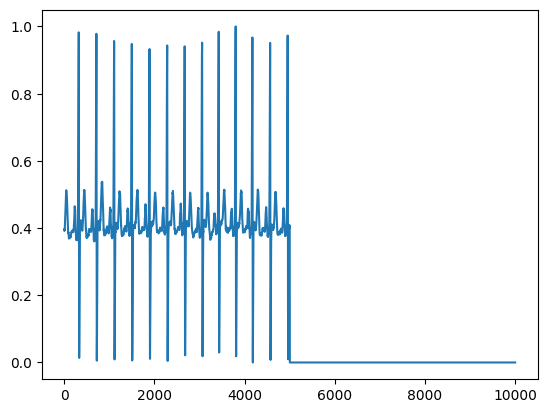

In [ ]:
with h5py.File('Normal_Sinus_rhythm','r') as hf:
    # hf.create_dataset("Normal_Sinus_rhythm_trace",shape = (0,5000),maxshape = (None,5000))
    print(hf['Normal_Sinus_rhythm_trace'].shape)
    # hf['Normal_Sinus_rhythm_trace'].resize(3,axis = 0)
    # hf['Normal_Sinus_rhythm_trace'][0] = signal
    # print(hf['Normal_Sinus_rhythm_trace'].shape)
    # print(hf['Normal_Sinus_rhythm_trace'][0])
    plt.plot(hf['Normal_Sinus_rhythm_trace'][1])
    hf.close()

In [ ]:
print(-np.array(Normal_Sinus_Rhythm).shape[0],[x for x in range(-np.array(Normal_Sinus_Rhythm).shape[0],0)])
samplearr = np.zeros([50])
samplearr[-3:]


In [ ]:
# Create txt files to save Normal Sinus Rhythm data, Atrial Fibrillation data and Atrial Flutter data
with open('E:/Arrythmia/txt/Normal_Sinus_rhythm.txt', 'w') as f:
    for item in Normal_Sinus_Rhythm:
        f.writelines("%s\n" % item)
with open('E:/Arrythmia/txt/Atrial_Fibrillation.txt', 'w') as f:
    for item in Atrial_Fibrillation:
        f.writelines("%s\n" % item)
with open('E:/Arrythmia/txt/Atrial_Flutter.txt', 'w') as f:
    for item in Atrial_Flutter:
        f.writelines("%s\n" % item)

In [ ]:
# Read txt files
with open('E:/Arrythmia/txt/Normal_Sinus_rhythm.txt', 'r') as f:
    Normal_Sinus_Rhythm = f.readlines()
    Normal_Sinus_Rhythm = [x.strip() for x in Normal_Sinus_Rhythm]
    for i in Normal_Sinus_Rhythm:
        print(i)
    # print(Normal_Sinus_Rhythm)

Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g1/JS00008
Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g1/JS00021
Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g1/JS00047
Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g1/JS00051
Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g1/JS00061
Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g1/JS00068
Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g1/JS00070
Data/The PhysioNetComputing in Cardiology Challenge 202

In [ ]:
for i in Normal_Sinus_Rhythm:
    print(i)

Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g1/JS00008
Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g1/JS00021
Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g1/JS00047
Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g1/JS00051
Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g1/JS00061
Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g1/JS00068
Data/The PhysioNetComputing in Cardiology Challenge 2021/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g1/JS00070
Data/The PhysioNetComputing in Cardiology Challenge 202